In [3]:
import pandas as pd 
import matplotlib
import os
import pickle

In [7]:
df = pd.read_csv("data/MSFT_Processed_Data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,change_tmr_%,Tmr_Projection
0,2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274220,27349400,0.321694,UP
1,2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455830,20198100,1.286125,UP
2,2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191380,35718900,-0.478620,DOWN
3,2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918953,30352700,-0.159793,DOWN
4,2016-12-15,62.700001,63.150002,62.299999,62.580002,56.828148,27669900,-0.449442,DOWN


In [8]:
target = df['Tmr_Projection']
predictor = df.drop(columns=['change_tmr_%','Tmr_Projection', 'Date'])

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X=predictor, y=target)

DecisionTreeClassifier()

[Text(0.4323757728435807, 0.9852941176470589, 'Adj Close <= 225.741\ngini = 0.497\nsamples = 1938\nvalue = [898, 1040]'),
 Text(0.20759306942550762, 0.9558823529411765, 'High <= 65.195\ngini = 0.492\nsamples = 1067\nvalue = [464, 603]'),
 Text(0.3199844211345442, 0.9705882352941178, 'True  '),
 Text(0.02181523381361241, 0.9264705882352942, 'Close <= 64.45\ngini = 0.485\nsamples = 63\nvalue = [37, 26]'),
 Text(0.01532962376091683, 0.8970588235294118, 'Low <= 63.51\ngini = 0.499\nsamples = 48\nvalue = [23, 25]'),
 Text(0.009433614622102664, 0.8676470588235294, 'Adj Close <= 56.665\ngini = 0.488\nsamples = 38\nvalue = [22, 16]'),
 Text(0.004716807311051332, 0.8382352941176471, 'Low <= 62.075\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.002358403655525666, 0.8088235294117647, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.007075210966576998, 0.8088235294117647, 'High <= 62.85\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.004716807311051332, 0.7794117647058824, 'gini =

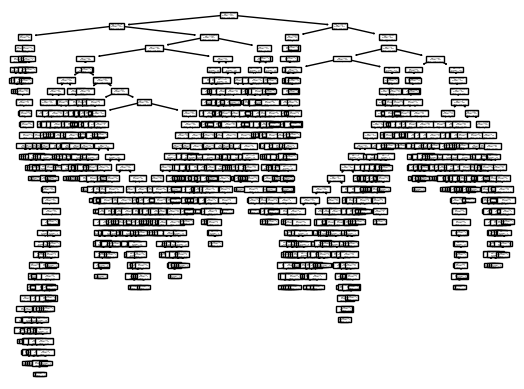

In [10]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model, feature_names=model.feature_names_in_)

In [97]:
y_pred = model.predict(predictor)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,UP
1,UP
2,DOWN
3,DOWN
4,DOWN
...,...
1932,UP
1933,UP
1934,DOWN
1935,DOWN


In [103]:
df_prediction = pd.DataFrame(target.copy())
df_prediction.reset_index(drop=True, inplace=True)
df_prediction['predicted'] = y_pred
df_prediction

,Tmr_Projection,predicted
0,UP,UP
1,UP,UP
2,DOWN,DOWN
3,DOWN,DOWN
4,DOWN,DOWN
...,...,...
1932,UP,UP
1933,UP,UP
1934,DOWN,DOWN
1935,DOWN,DOWN


In [124]:
total = df_prediction.predicted == df_prediction.Tmr_Projection
total.sum()


1937

In [125]:
model.score(X=predictor, y= y_pred)

1.0

In [132]:
os.makedirs('model', exist_ok=True)
model_path = open('model/model_classification.pkl', 'wb')
pickle.dump(model, model_path)